In [1]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 输入数据

In [2]:
data = pd.read_csv("SimilarityAnalysis.csv")
# print(data.shape) #输出尺寸
# print(data) #输出csv文件内容
target = data['Colour_Manual']
prediction = data['Colour']
x = target
y = prediction

### target和prediction误差平方和平均值

In [3]:
error = []
for i in range(len(target)):
    error.append(target[i] - prediction[i])
 
# print("Errors: ", error)
# print(error)


squaredError = []
absError = []
for val in error:
    squaredError.append(val * val)#误差平方 
    absError.append(abs(val))#误差绝对值
 
# print("Square Error: ", squaredError)
# print("Absolute Value of Error: ", absError)

### target均值和偏差

In [4]:
#target平均值
targetMean = target.mean()
# targetMean = sum(target) / len(target)

#target偏差（和均值误差的和）
targetDeviation = []
for val in target:
    targetDeviation.append((val - targetMean) * (val - targetMean))

### prediction均值和偏差

In [5]:
#prediction平均值
predictionMean = prediction.mean()
# predictionMean = sum(prediction) / len(prediction)

#prediction偏差
predictionDeviation = []
for val in prediction:
    predictionDeviation.append((val - predictionMean) * (val - predictionMean))

### target标准差

In [6]:
#样本标准差 sample standard deviation
SSD = target.std()
# SSD = sqrt(sum(targetDeviation) / (len(target)-1))
print("样本标准差 = ", SSD)

#总体标准差 opulation standard deviation
OSD = sqrt(sum(targetDeviation) / len(target))
print("总体标准差 = ", OSD)

样本标准差 =  0.9045340337332909
总体标准差 =  0.8624393618641034


### prediction标准差

In [7]:
#样本标准差 sample standard deviation
SSD = prediction.std()
# SSD = sqrt(sum(predictionDeviation) / (len(prediction)-1))
print("样本标准差 = ", SSD)

#总体标准差 opulation standard deviation
OSD = sqrt(sum(predictionDeviation) / len(prediction))
print("总体标准差 = ", OSD)

样本标准差 =  4.618045931619287
总体标准差 =  4.403134031216799


### 方差

In [8]:
#方差target
targetVariance = sum(targetDeviation) / len(targetDeviation)
print("Target的方差 = ", targetVariance)

#方差prediction
predictionVariance = sum(predictionDeviation) / len(predictionDeviation)
print("Prediction的方差 = ", predictionVariance)

Target的方差 =  0.743801652892562
Prediction的方差 =  19.3875892968595


### 协方差

In [9]:
cov_xy = sum([(x - targetMean)*(y - predictionMean) for x,y in zip(target, prediction)])/ len(x)
print(cov_xy)

3.191637190082645


### 协方差矩阵

In [10]:
# 计算协方差矩阵
covxy = np.cov(x, y)
print(covxy)

[[ 0.81818182  3.51080091]
 [ 3.51080091 21.32634823]]


### 相关系数

In [11]:
import math

#相关系数concordance correlation
#分子为协方差cov(x,y)
#计算分母，方差乘积的均值
sq = math.sqrt(sum([(x - targetMean)**2 for x in target])*sum([(x - predictionMean)**2 for x in prediction])) / len(x)
#分子协方差除以分母
corr_factor = cov_xy/sq
print("相关系数 = ",corr_factor)

相关系数 =  0.840471597836641


### 一致性相关系数CCC

In [12]:
#一致性相关系数CCC(concordance correlation coefficient)
CCC = (2 * corr_factor * sqrt(targetVariance * predictionVariance))/ (targetVariance + predictionVariance + (targetMean-predictionMean)**2)
print("CCC = ",CCC)       

CCC =  0.003024346449568752


### 均方误差MSE、均方根误差RMSE、平均绝对误差MAE

In [13]:
#均方误差MSE
MSE = sum(squaredError) / len(squaredError)
print("均方误差MSE = ", MSE)

#均方根误差RMSE
RMSE = sqrt(sum(squaredError) / len(squaredError))
print("均方根误差RMSE = ", RMSE)

#平均绝对误差MAE
MAE = sum(absError) / len(absError)
print("平均绝对误差MAE = ", MAE)

均方误差MSE =  2104.2460753345454
均方根误差RMSE =  45.872062034909064
平均绝对误差MAE =  45.72196363636363


## 绘制散点图

In [14]:
import matplotlib.pyplot as plt
import numpy as np

0.7063925067700759
 
4.291 x + 33.46
RMSE =  45.872062034909064
CCC =  0.003024346449568752


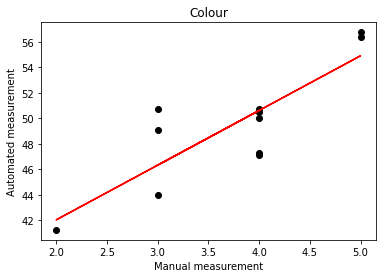

In [15]:
a=[target,prediction]
mcy=pd.DataFrame({'x_axis1': target,'y_axis1': prediction})

fig,ax=plt.subplots()
# 散点图
ax.scatter(target,prediction,color='black')

# 用polyfit函数来把这些点拟合成一条1次曲线
parameter = np.polyfit(x, y, 1)
p = np.poly1d(parameter)
plt.plot(x, p(x), color='r')

# 直线图
# X = np.arange(2,5)
# Y = X
# ax.plot(X, Y)

ax.set(xlabel='Manual measurement',ylabel='Automated measurement',title='Colour')
# ax.text(90, 180, "CCC=0.985028",fontsize=10, color = "black", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right', rotation=0)
# plt.show()
# for i in range(len(Length_Manual)):
#     ax.text(people_flow[i]*1.01, confirm[i]*1.01, city_name[i], fontsize=10, color = "r", style = "italic", weight = "light", verticalalignment='center', horizontalalignment='right',rotation=0) #给散点加标签


# 利用相关系数矩阵计算R方
correlation = np.corrcoef(x, y)[0,1]  #相关系数
Rfang=correlation**2   #R方
print(Rfang)
p = np.poly1d(parameter,variable='x')
print(p)
print("RMSE = ", RMSE)
print("CCC = ",CCC) 

